<a href="https://colab.research.google.com/github/farhan1503001/Deep-Learning-Rhyme-Projects/blob/main/Superhero_Name_Generator_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [2]:
with open(file='/content/superhero/superheroes.txt',mode='r') as reader:
  data=reader.read()
data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [5]:
token_maker=tf.keras.preprocessing.text.Tokenizer(
    filters='!#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n'
)

In [6]:
token_maker.fit_on_texts(data)

In [7]:
char_to_index=token_maker.word_index
index_to_char=dict((v,k) for k,v in char_to_index.items())

print(index_to_char)
print(char_to_index)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}
{'\t': 1, 'a': 2, 'e': 3, 'r': 4, 'o': 5, 'n': 6, 'i': 7, ' ': 8, 't': 9, 's': 10, 'l': 11, 'm': 12, 'h': 13, 'd': 14, 'c': 15, 'u': 16, 'g': 17, 'k': 18, 'b': 19, 'p': 20, 'y': 21, 'w': 22, 'f': 23, 'v': 24, 'j': 25, 'z': 26, 'x': 27, 'q': 28}


## Task 3

1. Converting between names and sequences

In [8]:
#Now spliting each item of dataset
hero_names=data.splitlines()
hero_names[:15]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t',
 'pyrrha\t',
 'the rhino\t',
 'major glory\t',
 'drago\t',
 'king vegeta\t']

In [9]:
hero_name_dataset=token_maker.texts_to_sequences(hero_names[0])
hero_name_dataset[0][0]

25

In [10]:
#Now we are writing a function which will transform the whole dataset to sequence form

def seq_maker(text):
  return [token_maker.texts_to_sequences(character)[0][0] for character in text]

In [11]:
print(seq_maker(hero_names[10]))

[20, 21, 4, 4, 13, 2, 1]


In [12]:
#Now writing completely opposite 
#Here for making characters into a name we are to join them with \''
def text_maker(seq):
  return ''.join([index_to_char[i] for i in seq if i!=0])


In [13]:
print(text_maker(seq_maker(hero_names[10])))

pyrrha	


## Task 4

1. Creating sequences
2. Padding all sequences

(array([ 672., 2406., 2414., 1990.,  981.,  387.,  121.,   57.,   16.,
           9.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33.]),
 <a list of 10 Patch objects>)

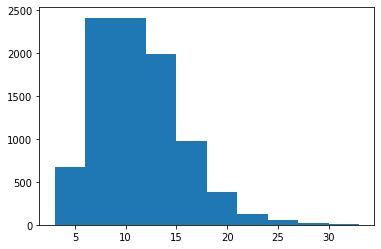

In [14]:
name_lengths=[len(x) for x in hero_names]
import matplotlib.pyplot as plt
plt.hist(name_lengths,bins=10)

In [15]:
#Now making the dataset from hero_names dataset for making predictions
sequences_dataset=[]
for names in hero_names:
  seq=seq_maker(names)
  if len(seq)>=2:
    sequences_dataset+=[seq[:i]for i in range(2,len(seq)+1)]

In [16]:
#Now inspecting the new dataset
sequences_dataset[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [17]:
max_length=max([len(x)for x in sequences_dataset])
max_length

33

In [18]:
#Now we have to perform padding for making all variables of same size
#we will use pre-padding
padded_sequences_dataset=tf.keras.preprocessing.sequence.pad_sequences(sequences_dataset,maxlen=max_length,padding='pre')

In [19]:
print(len(padded_sequences_dataset))
print(padded_sequences_dataset.shape)

88279
(88279, 33)


In [20]:
padded_sequences_dataset[10]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  5, 15,  9,  5,  4,  8],
      dtype=int32)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [21]:
#Here we set last character is the character to be predicted that's why it's a label
#It also explains why we performed pre-padding
text_dataset,labels=padded_sequences_dataset[:,:-1],padded_sequences_dataset[:,-1]

In [22]:
#Now seeing the shape of text and labels
print("Text dataset shapes : ",text_dataset.shape)
print("Label dataset shapes : ",labels.shape)

Text dataset shapes :  (88279, 32)
Label dataset shapes :  (88279,)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(text_dataset,labels,test_size=0.2,random_state=42)
print("Training data size: ",x_train.shape)
print("Testing data size: ", x_test.shape)

Training data size:  (70623, 32)
Testing data size:  (17656, 32)


In [24]:
#Now finding the length of character dictionary
dict_size=len(char_to_index.items())+1
print(dict_size)

29


## Task 6: Creating the Model

In [32]:
model=tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(dict_size,output_dim=16,input_length=max_length-1),
     tf.keras.layers.Conv1D(64,4,strides=1,padding='causal',activation='relu'),
     tf.keras.layers.MaxPool1D(2),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
     tf.keras.layers.Dense(29,activation='softmax')
     
    ]
)

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Task 7: Training the Model

In [34]:
history=model.fit(x_train,y_train,epochs=50,
                  verbose=1,
                  validation_data=(x_test,y_test),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)])

Epoch 1/50
2207/2207 [==============================] - 30s 11ms/step - loss: 2.8499 - accuracy: 0.1528 - val_loss: 2.5198 - val_accuracy: 0.2365
Epoch 2/50
2207/2207 [==============================] - 24s 11ms/step - loss: 2.5170 - accuracy: 0.2351 - val_loss: 2.4822 - val_accuracy: 0.2562
Epoch 3/50
2207/2207 [==============================] - 24s 11ms/step - loss: 2.4404 - accuracy: 0.2620 - val_loss: 2.3943 - val_accuracy: 0.2715
Epoch 4/50
2207/2207 [==============================] - 24s 11ms/step - loss: 2.3687 - accuracy: 0.2829 - val_loss: 2.3443 - val_accuracy: 0.2925
Epoch 5/50
2207/2207 [==============================] - 24s 11ms/step - loss: 2.3210 - accuracy: 0.2954 - val_loss: 2.3137 - val_accuracy: 0.3014
Epoch 6/50
2207/2207 [==============================] - 23s 11ms/step - loss: 2.2650 - accuracy: 0.3115 - val_loss: 2.2612 - val_accuracy: 0.3162
Epoch 7/50
2207/2207 [==============================] - 24s 11ms/step - loss: 2.2084 - accuracy: 0.3331 - val_loss: 2.2516 -

## Task 8: Generate Names!

In [42]:
def generate_name(seed):
  for i in range(40):
    seq=seq_maker(seed)
    padded=tf.keras.preprocessing.sequence.pad_sequences([seq],maxlen=max_length-1,padding='pre',truncating='pre')
    pred=model.predict_classes(padded)[0]
    pred_char=index_to_char[pred]
    seed+=pred_char
    if pred_char=='\t':
      break
  print(seed)  

In [43]:
generate_name('r')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


red shider	
